# Solusi Numerik Persamaan Gelombang Menggunakan Metode Finite Difference (FD)

Persamaan gelombang 1D dapat dinyataka sebagai berikut,
\begin{equation}
\frac{\partial^2 u}{\partial t^2}=v^2\frac{\partial^2u}{\partial x^2}\quad\quad 0\le x\le 1\quad 0<t\le 1\quad\quad\quad(1)
\end{equation}
dengan boundary condition,
\begin{equation}
u(0,t)=0\quad\quad u(1,t)=0 \quad\quad\quad(2)
\end{equation}
dan initial condition,
\begin{equation}
\left.\frac{\partial u}{\partial t}\right|_{x_i,0}=0 \quad\quad\quad(3)
\end{equation}
dan
\begin{equation}
u(x,0)=e^{-\frac{(x-0.5)^2}{2\cdot 10^{-3}}} \quad\quad\quad(4)
\end{equation}
Hitung $u$ pada rentang $0\le x\le 1 \quad 0<t\le 1$ pada interval $dx=0.01$ dan $dt=0.01$, jika $v=1$. Ingat bahwa syarat kestabilan CFL harus selalu terpenuhi.

## Solusi menggunakan metode FD (eksplisit/time extrapolation)

Persamaan (1) diubah ke dalam bentuk diskrit,
\begin{equation}
\frac{u_i^{n-1}-2u_i^n+u_i^{n+1}}{(dt)^2}=v_i^2\frac{u_{i-1}^n-2u_i^n+u_{i+1}^n}{(dx)^2}\quad\quad(5)
\end{equation}
Persamaan (4) diubah ke dalam bentuk:
\begin{equation}
u_i^{n+1}=v_i^2\cdot dt^2\left(\frac{u_{i-1}^n-2u_i^n+u_{i+1}^n}{dx^2}\right)+2u_i^n-u_i^{n-1} \quad\quad(6)
\end{equation}

dari persamaan (3):
\begin{equation}
\left.\frac{\partial u}{\partial t}\right|_{x_i,0}=\frac{u_i^{0}-u_i^{-1}}{dt}=0\quad\quad u_i^{-1}=u_i^0\quad\quad (7)
\end{equation}

### 01 Visualisasi initial condition $u(x,0)$

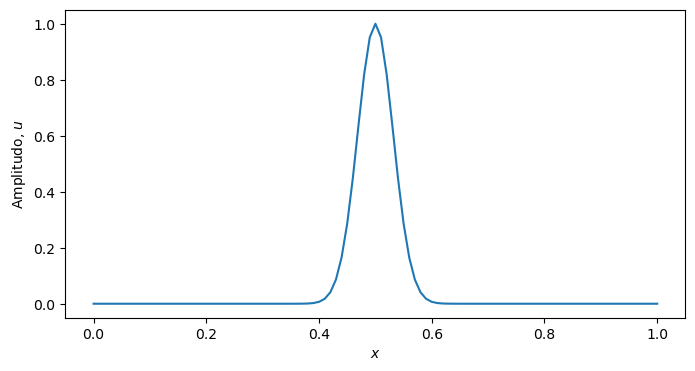

In [2]:
import numpy as np
import matplotlib.pyplot as plt

vv=1
dx=0.01
dt=0.01
nx=int(1/dx)+1
nt=int(1/dt)+1
x0=0.5
xx=np.arange(0,1+dx,dx)
#initial condition: persamaan 4
yy=np.exp(-(xx-x0)**2/0.002)
plt.subplots(figsize=(8,4))
plt.plot(xx,yy)
plt.xlabel(r"$x$")
plt.ylabel("Amplitudo, $u$")
plt.show()

### 02 Solusi numerik persamaan 6
\begin{equation}
dudx2=\frac{u_{i-1}^n-2u_i^n+u_{i+1}^n}{dx^2}
\end{equation}

In [3]:
u2=np.zeros(nx) #n+1
u1=np.zeros(nx) #n
u0=np.zeros(nx) #n-1
dudx2=np.zeros(nx)

uu2=np.zeros(nx)
uu4=np.zeros(nx)
uu8=np.zeros(nx)
uu10=np.zeros(nx)

#initial condition, persamaan 4
u1=list(yy)
#Boundary condition, persamaan 2
u1[0]=0
u1[nx-1]=0

for it in range(1,nt):
    #compute spatial derivatives
    for ix in range(1,nx-1):
        dudx2[ix]=(u1[ix-1]-2*u1[ix]+u1[ix+1])/dx**2
    if (it==1):
        u0=list(u1) # persamaan 7
    #time extrapolation, persamaan 6
    u2 = vv**2*dt**2*dudx2+u1+u1-u0
    #BC
    u2[0]=u2[nx-1]=0
    u0=list(u1)
    u1=list(u2)
    #simpan nilai u pada t=0.2 
    if (it*dt==0.2):
        uu2=list(u1)
    #simpan nilai u pada t=0.4 
    if (it*dt==0.4):
        uu4=list(u1)
    #simpan nilai u pada t=0.8
    if (it*dt==0.8):
        uu8=list(u1)
    #simpan nilai u pada t=1
    if (it*dt==1):
        uu10=list(u1)

### 03 Plot sintetik seismogram

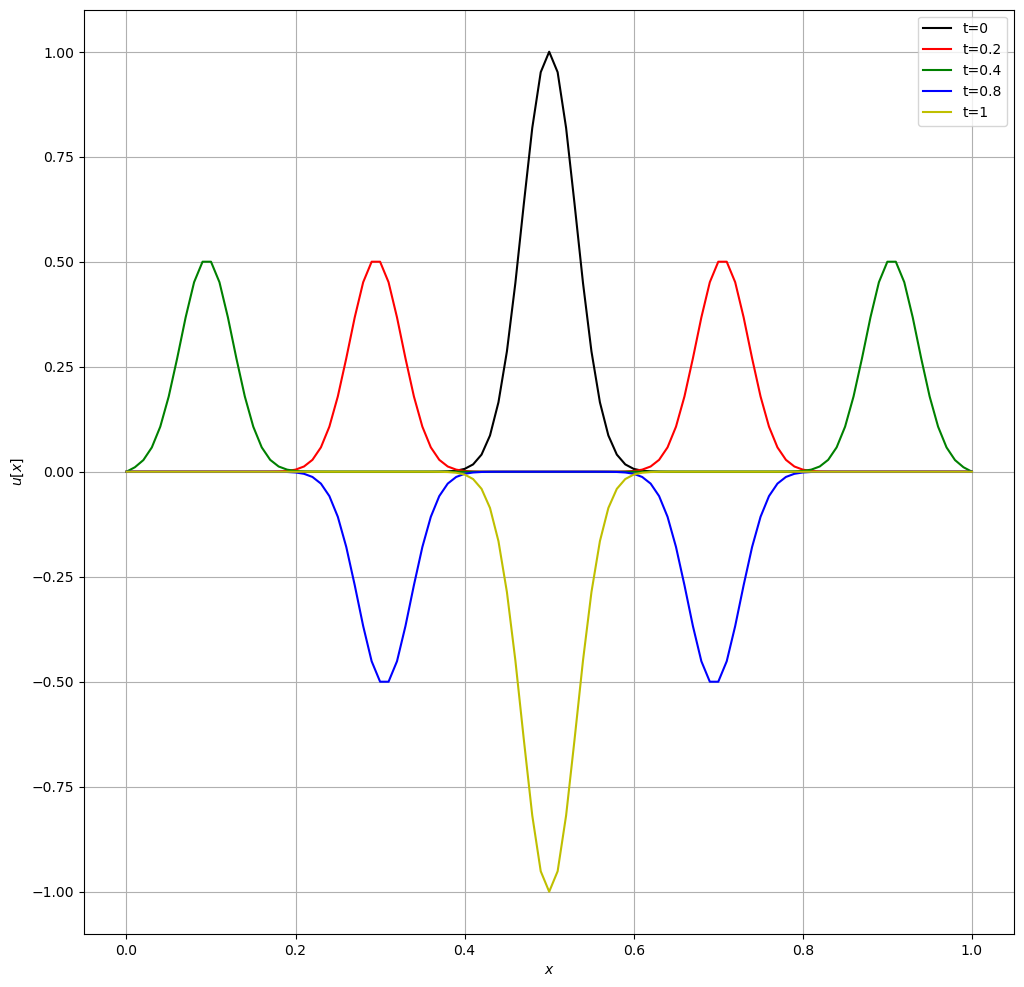

In [4]:
plt.subplots(figsize=(12,12))
plt.plot(xx,yy,"k",markersize=15,label="t=0")
plt.plot(xx,uu2,"r",markersize=15,label="t=0.2")
plt.plot(xx,uu4,"g",markersize=15,label="t=0.4")
plt.plot(xx,uu8,"b",markersize=15,label="t=0.8")
plt.plot(xx,uu10,"y",markersize=15,label="t=1")
plt.legend()
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$u[x]$")
plt.savefig("PDE_hyperbolic1.png", bbox_inches='tight')

### Persamaan gelombang dengan fungsi sumber
Pada kenyataannya, gelombang seismik yang merambat pada media batuan di bawah permukaan bumi terjadi akibat adanya sumber pembangkitan gelombang. Sumber gelombang tersebut bisa berupa sumber pasif seperti pada gempabumi ataupun sumber aktif seperti pada seismologi eksplorasi (seismik refleksi dan refraksi). Jika dilibatkan faktor sumber gelombang, maka persamaan gelombang 1D: 
\begin{equation}
\frac{\partial^2 u}{\partial t^2}-v^2\frac{\partial^2u}{\partial x^2}=f(x_s,t)
\end{equation}
$x_s$ adalah posisi sumber gelombang, $f(x_s,t)$ adalah \textit{source time function}. Salah satu bentuk fungsi sumber yang dapat digunakan misalnya wavelet Ricker,
\begin{equation}
f(t)=\left[1-2\pi^2f_0^2(t-t_0)^2\right]\exp\left(-\pi^2f_0^2t^2\right)
\end{equation}
$f_0$ adalah frequensi dominan. Pada persamaan di atas disisipkan $t_0$ yang merepresentasikan posisi dari puncak waveletnya.
Dengan adanya faktor \textit{source time function}, maka bentuk \textit{time-extrapolation} menjadi,
\begin{equation}
u_i^{n+1}=v_i^2\cdot dt^2\left(\frac{u_{i-1}^n-2u_i^n+u_{i+1}^n}{dx^2}\right)+2u_i^n-u_i^{n-1}+dt^2f(x_s,t)
\end{equation}

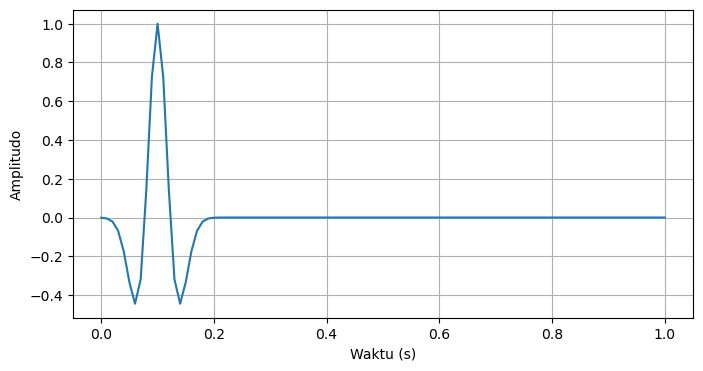

In [5]:
# source time function
tricker=np.arange(0,1+dt,dt)
f0=10
t0=0.1
yricker=(1.0 - 2.0*(np.pi**2)*(f0**2)*((tricker-t0)**2)) * np.exp(-(np.pi**2)*(f0**2)*((tricker-t0)**2))
plt.subplots(figsize=(8,4))
plt.plot(tricker,yricker)
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")
plt.grid()
plt.savefig("Ricker",bbox_inches="tight")

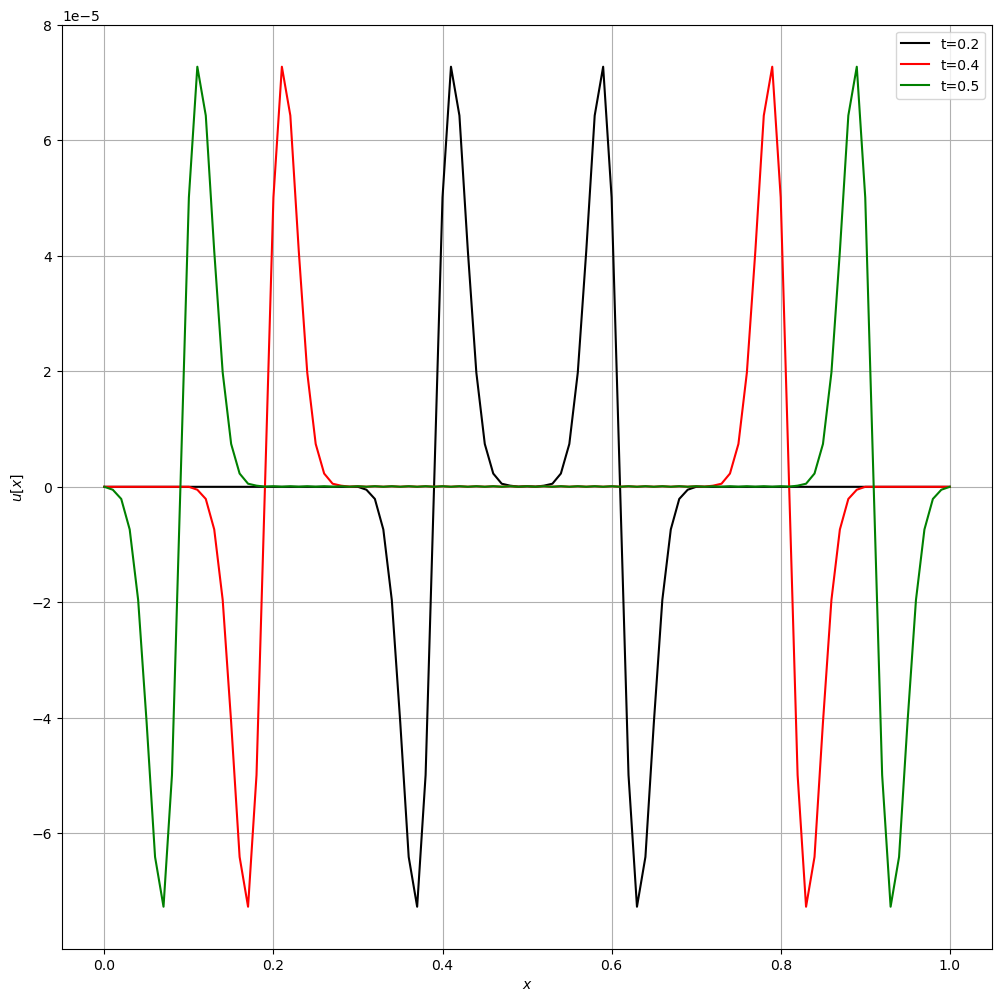

In [7]:
#source location x=0.5
xs=0.5
xsi=int(xs/dx)

u2=np.zeros(nx) #n+1
u1=np.zeros(nx) #n
u0=np.zeros(nx) #n-1
dudx2=np.zeros(nx)

uu2=np.zeros(nx)
uu4=np.zeros(nx)
uu8=np.zeros(nx)
uu10=np.zeros(nx)

#initial condition, u1=0
#Boundary condition, persamaan ...
u1[0]=0
u1[nx-1]=0
for it in range(1,nt):
    #compute spatial derivatives
    for ix in range(1,nx-1):
        dudx2[ix]=(u1[ix-1]-2*u1[ix]+u1[ix+1])/dx**2
    if (it==1):
        u0=list(u1) # persamaan 7
    #time extrapolation, persamaan 6
    u2 = vv**2*dt**2*dudx2+u1+u1-u0
    #add source time function
    u2[xsi] = u2[xsi] + dt**2*yricker[it]
    #BC
    u2[0]=0#u2[1]
    u2[nx-1]=0#u2[nx-2]
    u0=list(u1)
    u1=list(u2)
    #simpan nilai u pada t=0.2
    if (it*dt==0.2):
        uu2=list(u1)
    #simpan nilai u pada t=0.4 
    if (it*dt==0.4):
        uu4=list(u1)
    #simpan nilai u pada t=0.5
    if (it*dt==0.5):
        uu8=list(u1)
    #simpan nilai u pada t=1
    if (it*dt==1):
        uu10=list(u1)
        
plt.subplots(figsize=(12,12))
plt.plot(xx,uu2,"k",markersize=15,label="t=0.2")
plt.plot(xx,uu4,"r",markersize=15,label="t=0.4")
plt.plot(xx,uu8,"g",markersize=15,label="t=0.5")
#plt.plot(xx,uu10,"b",markersize=15,label="t=1")
plt.legend()
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$u[x]$")
plt.savefig("PDE_hyperbolic3.png", bbox_inches='tight')

# Latihan-1
Hitunglah solusi persamaan gelombang (persamaan 1 di atas), dengan initial condition (persamaan 3 dan 4) yang sama tetapi syarat batasnya,
\begin{equation}
\left.\frac{\partial u}{\partial x}\right|_{0,t}=0
\end{equation}
\begin{equation}
\left.\frac{\partial u}{\partial x}\right|_{1,t}=0
\end{equation}